In [5]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/fc/85/ec986ea64f55013d8c669da657f0da86383a15668f9814be2001e08a4807/pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 48.8 MB/s eta 0:00:0000:010:01
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv('data/data_daily.csv')

In [8]:
df.index = pd.to_datetime(df['# Date'])


In [10]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/57/44/007b592809f50883c910db9ec4b81b16dfa0136407250fb581824daabf03/matplotlib-3.8.2-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fe/26/43821d61b7ee62c1809ec852bc572aaf4c27f101ebcebbbcce29a5ee0445/contourpy-1.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/4e/c0/a7b9a680899e0c09254cf2b81b33517043bc753db158c9b1e71d28099bc2/fonttools-4.45.0-cp310-cp310-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.0/155.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

<Axes: xlabel='# Date'>

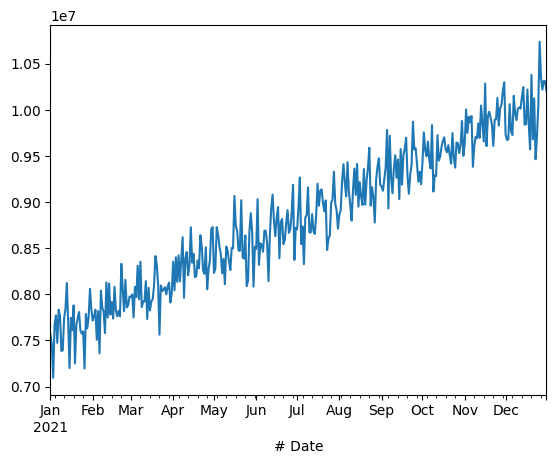

In [11]:
df['Receipt_Count'].plot()

In [13]:
def df_to_X_y(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [14]:
receipt = df['Receipt_Count']

In [21]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(receipt, WINDOW_SIZE)
X1.shape, y1.shape

((335, 30, 1), (335,))

In [22]:
X_train1, y_train1 = X1[:300], y1[:300]
X_val1, y_val1 = X1[300:325], y1[300:325]
X_test1, y_test1 = X1[325:], y1[325:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((300, 30, 1), (300,), (25, 30, 1), (25,), (10, 30, 1), (10,))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((30, 1)))
model1.add(LSTM(16))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 16)                1152      
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1297 (5.07 KB)
Trainable params: 1297 (5.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
cp1 = ModelCheckpoint('models/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [28]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
 1/10 [==>...........................] - ETA: 6s - loss: 76700926869504.0000 - root_mean_squared_error: 8757907.0000INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets


10/10 [==============================] - 2s 130ms/step - loss: 77992772501504.0000 - root_mean_squared_error: 8831352.0000 - val_loss: 99283168657408.0000 - val_root_mean_squared_error: 9964094.0000
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 77992780890112.0000 - root_mean_squared_error: 8831352.0000 - val_loss: 99283168657408.0000 - val_root_mean_squared_error: 9964094.0000
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 77992789278720.0000 - root_mean_squared_error: 8831353.0000 - val_loss: 99283168657408.0000 - val_root_mean_squared_error: 9964094.0000
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 77992780890112.0000 - root_mean_squared_error: 8831352.0000 - val_loss: 99283168657408.0000 - val_root_mean_squared_error: 9964094.0000
Epoch 5/10
 1/10 [==>...........................] - ETA: 0s - loss: 78512304160768.0000 - root_mean_squared_error: 8860717.0000INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets


10/10 [==============================] - 1s 99ms/step - loss: 77992772501504.0000 - root_mean_squared_error: 8831352.0000 - val_loss: 99283143491584.0000 - val_root_mean_squared_error: 9964093.0000
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 77992772501504.0000 - root_mean_squared_error: 8831352.0000 - val_loss: 99283143491584.0000 - val_root_mean_squared_error: 9964093.0000
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 77992764112896.0000 - root_mean_squared_error: 8831351.0000 - val_loss: 99283143491584.0000 - val_root_mean_squared_error: 9964093.0000
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 77992764112896.0000 - root_mean_squared_error: 8831351.0000 - val_loss: 99283143491584.0000 - val_root_mean_squared_error: 9964093.0000
Epoch 9/10
10/10 [==============================] - 0s 5ms/step - loss: 77992764112896.0000 - root_mean_squared_error: 8831351.0000 - val_loss: 99283143491584.0000 - val_root_mea

In [29]:
df = pd.read_csv('data/data_daily.csv')

In [31]:
# Convert the '# Date' column to datetime
df['# Date'] = pd.to_datetime(df['# Date'])

# Set '# Date' as the index
df.set_index('# Date', inplace=True)

# Prepare data
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Split the data
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train, y_train = train[['Month', 'Day', 'DayOfWeek']], train['Receipt_Count'].values
X_test, y_test = test[['Month', 'Day', 'DayOfWeek']], test['Receipt_Count'].values

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [37]:
X_train_reshaped.shape

(292, 3, 1)

In [39]:
# Reshape the input data for LSTM
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [56]:
type(y_train)

numpy.ndarray

In [47]:
# Define the LSTM model
def create_lstm_model(learning_rate=0.001, units=50):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [48]:
from sklearn.model_selection import ParameterGrid

In [49]:
# Define hyperparameters for grid search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [50, 100, 150]
}

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
# Perform grid search manually
best_rmse = float('inf')
best_params = {}

for params in ParameterGrid(param_grid):
    model = create_lstm_model(learning_rate=params['learning_rate'], units=params['units'])
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=0)

    lstm_predictions = model.predict(X_test_reshaped)
    lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

    if lstm_rmse < best_rmse:
        best_rmse = lstm_rmse
        best_params = params

3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 1ms/step


3/3 [==============================] - 0s 2ms/step


In [60]:
final_model = create_lstm_model(learning_rate=best_params['learning_rate'], units=best_params['units'])
final_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=2)

# Make predictions on the test set
lstm_predictions_scaled = final_model.predict(X_test_reshaped)

Epoch 1/100
10/10 - 1s - loss: 73740981370880.0000 - 684ms/epoch - 68ms/step
Epoch 2/100
10/10 - 0s - loss: 73739681136640.0000 - 22ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 73738364125184.0000 - 23ms/epoch - 2ms/step
Epoch 4/100
10/10 - 0s - loss: 73737055502336.0000 - 28ms/epoch - 3ms/step
Epoch 5/100
10/10 - 0s - loss: 73735738490880.0000 - 24ms/epoch - 2ms/step
Epoch 6/100
10/10 - 0s - loss: 73734438256640.0000 - 28ms/epoch - 3ms/step
Epoch 7/100
10/10 - 0s - loss: 73733112856576.0000 - 27ms/epoch - 3ms/step
Epoch 8/100
10/10 - 0s - loss: 73731821010944.0000 - 24ms/epoch - 2ms/step
Epoch 9/100
10/10 - 0s - loss: 73730529165312.0000 - 24ms/epoch - 2ms/step
Epoch 10/100
10/10 - 0s - loss: 73729212153856.0000 - 28ms/epoch - 3ms/step
Epoch 11/100
10/10 - 0s - loss: 73727911919616.0000 - 24ms/epoch - 2ms/step
Epoch 12/100
10/10 - 0s - loss: 73726620073984.0000 - 26ms/epoch - 3ms/step
Epoch 13/100
10/10 - 0s - loss: 73725311451136.0000 - 23ms/epoch - 2ms/step
Epoch 14/100
10/10 

In [62]:
import matplotlib.pyplot as plt

Best Parameters: {'learning_rate': 0.1, 'units': 150}
LSTM RMSE: 9872823.461619219


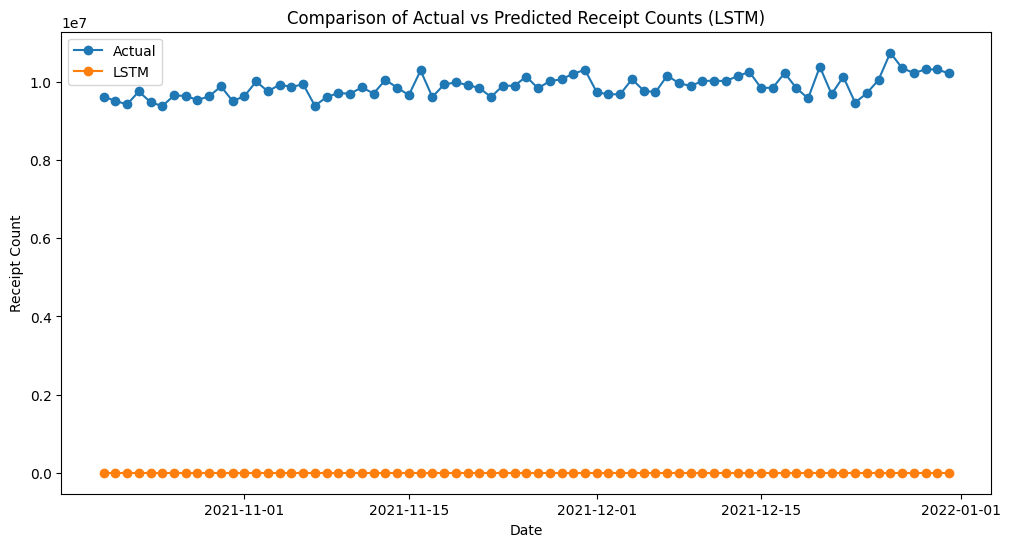

In [63]:
# Evaluate the model on the test set
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'Best Parameters: {best_params}')
print(f'LSTM RMSE: {lstm_rmse}')

# Plotting
plt.figure(figsize=(12, 6))

# Actual values
plt.plot(test.index, y_test, label='Actual', marker='o')

# LSTM predictions
plt.plot(test.index, lstm_predictions, label='LSTM', marker='o')

plt.title('Comparison of Actual vs Predicted Receipt Counts (LSTM)')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.legend()
plt.show()


Epoch 1/30
19/19 - 2s - loss: 0.0763 - 2s/epoch - 112ms/step
Epoch 2/30
19/19 - 0s - loss: 0.0248 - 400ms/epoch - 21ms/step
Epoch 3/30
19/19 - 0s - loss: 0.0160 - 394ms/epoch - 21ms/step
Epoch 4/30
19/19 - 0s - loss: 0.0115 - 388ms/epoch - 20ms/step
Epoch 5/30
19/19 - 0s - loss: 0.0109 - 382ms/epoch - 20ms/step
Epoch 6/30
19/19 - 0s - loss: 0.0095 - 408ms/epoch - 21ms/step
Epoch 7/30
19/19 - 0s - loss: 0.0103 - 381ms/epoch - 20ms/step
Epoch 8/30
19/19 - 0s - loss: 0.0133 - 395ms/epoch - 21ms/step
Epoch 9/30
19/19 - 0s - loss: 0.0108 - 382ms/epoch - 20ms/step
Epoch 10/30
19/19 - 0s - loss: 0.0083 - 389ms/epoch - 20ms/step
Epoch 11/30
19/19 - 0s - loss: 0.0100 - 389ms/epoch - 20ms/step
Epoch 12/30
19/19 - 0s - loss: 0.0114 - 409ms/epoch - 22ms/step
Epoch 13/30
19/19 - 0s - loss: 0.0073 - 397ms/epoch - 21ms/step
Epoch 14/30
19/19 - 0s - loss: 0.0085 - 393ms/epoch - 21ms/step
Epoch 15/30
19/19 - 0s - loss: 0.0087 - 394ms/epoch - 21ms/step
Epoch 16/30
19/19 - 0s - loss: 0.0074 - 393ms/epoch

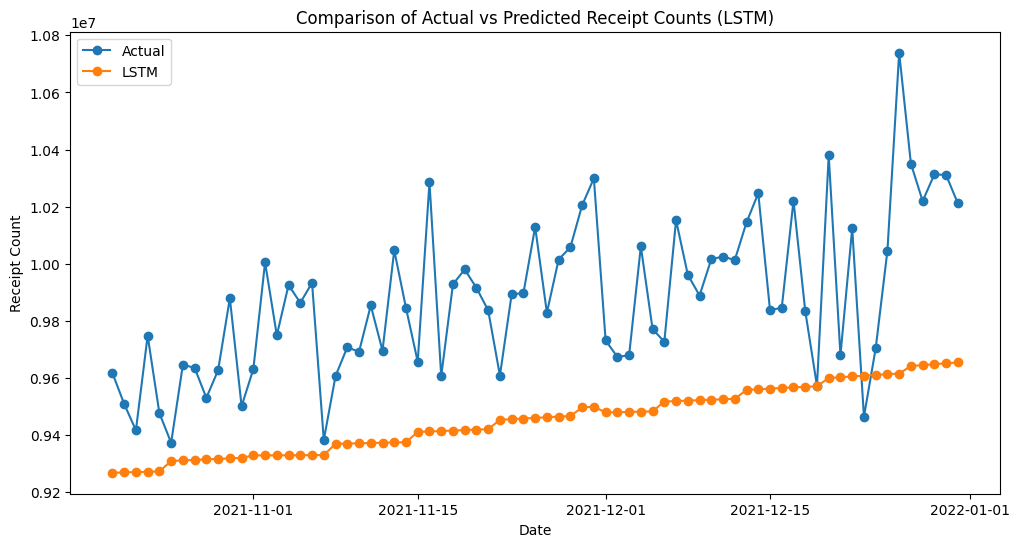

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your data (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('data/data_daily.csv')

# Convert the '# Date' column to datetime
df['# Date'] = pd.to_datetime(df['# Date'])

# Set '# Date' as the index
df.set_index('# Date', inplace=True)

# Prepare data
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Split the data
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train, y_train = train[['Month', 'Day', 'DayOfWeek']], train['Receipt_Count'].values
X_test, y_test = test[['Month', 'Day', 'DayOfWeek']], test['Receipt_Count'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
model.add(LSTM(500, return_sequences=True))
model.add(LSTM(500))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=30, batch_size=16, verbose=2)

# Make predictions on the test set
lstm_predictions_scaled = model.predict(X_test_reshaped)

# Inverse transform the predictions to the original scale
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled).flatten()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual values
plt.plot(test.index, y_test, label='Actual', marker='o')

# LSTM predictions
plt.plot(test.index, lstm_predictions, label='LSTM', marker='o')

plt.title('Comparison of Actual vs Predicted Receipt Counts (LSTM)')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.legend()
plt.show()


In [91]:
lstm_predictions

array([9268612., 9269755., 9270873., 9271956., 9273000., 9309803.,
       9311689., 9313545., 9315364., 9317136., 9318855., 9320513.,
       9329167., 9329378., 9329599., 9329821., 9330038., 9330242.,
       9330426., 9369673., 9370668., 9371655., 9372625., 9373572.,
       9374487., 9375365., 9411262., 9412962., 9414637., 9416277.,
       9417875., 9419423., 9420914., 9453758., 9456086., 9458368.,
       9460598., 9462768., 9464870., 9466897., 9496978., 9499852.,
       9479658., 9480612., 9481542., 9482438., 9483296., 9517712.,
       9519374., 9521010., 9522612., 9524172., 9525683., 9527138.,
       9558555., 9560825., 9563051., 9565226., 9567343., 9569393.,
       9571371., 9600066., 9602870., 9605612., 9608287., 9610886.,
       9613403., 9615832., 9642072., 9645334., 9648521., 9651622.,
       9654632.], dtype=float32)

In [92]:
y_test

array([ 9617606,  9509561,  9417190,  9748484,  9476970,  9373507,
        9646801,  9635634,  9530612,  9627467,  9879362,  9501436,
        9631220, 10004975,  9749567,  9925777,  9863408,  9933505,
        9383028,  9607159,  9707735,  9691895,  9854091,  9695957,
       10047149,  9845653,  9656831, 10285056,  9606579,  9928425,
        9980182,  9915679,  9837099,  9608834,  9893666,  9897017,
       10129048,  9828852, 10014982, 10057900, 10204676, 10299217,
        9731627,  9674146,  9679469, 10060861,  9771507,  9726983,
       10152789,  9961637,  9888931, 10016144, 10025271, 10013123,
       10144930, 10246870,  9838107,  9845904, 10220516,  9835059,
        9572522, 10379305,  9680446, 10124238,  9464659,  9703857,
       10045897, 10738865, 10350408, 10219445, 10313337, 10310644,
       10211187])

In [93]:
def create_improved_lstm_model(learning_rate=0.001, units=100, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 1s 5ms/step


3/3 [==============================] - 1s 7ms/step


3/3 [==============================] - 1s 4ms/step


3/3 [==============================] - 1s 7ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 4ms/step


3/3 [==============================] - 0s 5ms/step


3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 2s 5ms/step


3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 1s 3ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 2ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 1s 3ms/step


3/3 [==============================] - 0s 3ms/step


3/3 [==============================] - 1s 4ms/step
{'dropout_rate': 0.4, 'learning_rate': 0.001, 'units': 100}


Epoch 1/30
19/19 - 3s - loss: 0.1680 - 3s/epoch - 133ms/step
Epoch 2/30
19/19 - 0s - loss: 0.0339 - 81ms/epoch - 4ms/step
Epoch 3/30
19/19 - 0s - loss: 0.0234 - 76ms/epoch - 4ms/step
Epoch 4/30
19/19 - 0s - loss: 0.0203 - 115ms/epoch - 6ms/step
Epoch 5/30
19/19 - 0s - loss: 0.0159 - 74ms/epoch - 4ms/step
Epoch 6/30
19/19 - 0s - loss: 0.0159 - 72ms/epoch - 4ms/step
Epoch 7/30
19/19 - 0s - loss: 0.0146 - 71ms/epoch - 4ms/step
Epoch 8/30
19/19 - 0s - loss: 0.0141 - 72ms/epoch - 4ms/step
Epoch 9/30
19/19 - 0s - loss: 0.0150 - 70ms/epoch - 4ms/step
Epoch 10/30
19/19 - 0s - loss: 0.0142 - 77ms/epoch - 4ms/step
Epoch 11/30
19/19 - 0s - loss: 0.0131 - 74ms/epoch - 4ms/step
Epoch 12/30
19/19 - 0s - loss: 0.0139 - 70ms/epoch - 4ms/step
Epoch 13/30
19/19 - 0s - loss: 0.0126 - 71ms/epoch - 4ms/step
Epoch 14/30
19/19 - 0s - loss: 0.0112 - 71ms/epoch - 4ms/step
Epoch 15/30
19/19 - 0s - loss: 0.0124 - 128ms/epoch - 7ms/step
Epoch 16/30
19/19 - 0s - loss: 0.0126 - 76ms/epoch - 4ms/step
Epoch 17/30
19/

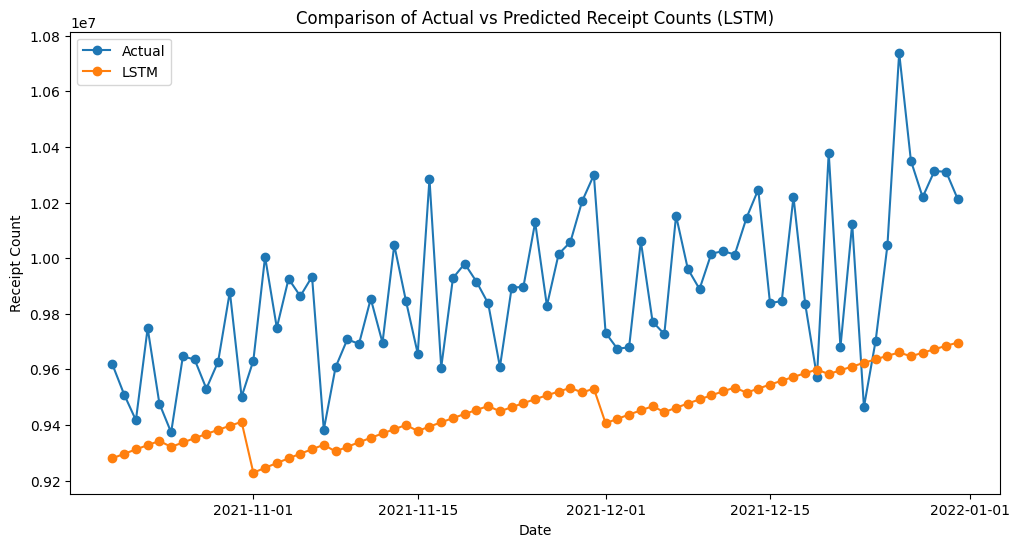

In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your data (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('data/data_daily.csv')

# Convert the '# Date' column to datetime
df['# Date'] = pd.to_datetime(df['# Date'])

# Set '# Date' as the index
df.set_index('# Date', inplace=True)

# Prepare data
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Split the data
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train, y_train = train[['Month', 'Day', 'DayOfWeek']], train['Receipt_Count'].values
X_test, y_test = test[['Month', 'Day', 'DayOfWeek']], test['Receipt_Count'].values

# Scale the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(500, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
model.add(LSTM(500, return_sequences=True))
model.add(LSTM(500))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define hyperparameters for grid search
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [50, 100, 150],
    'dropout_rate': [0.2,0.3,0.4]
}
# Perform grid search manually
best_rmse = float('inf')
best_params = {}

for params in ParameterGrid(param_grid):
    model = create_improved_lstm_model(
        learning_rate=params['learning_rate'],
        units=params['units'],
        dropout_rate=params['dropout_rate']
    )
    
    model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=32, verbose=0)

    lstm_predictions_scaled = model.predict(X_test_reshaped)
    lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled).flatten()

    lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

    if lstm_rmse < best_rmse:
        best_rmse = lstm_rmse
        best_params = params

print(best_params)
# Build the final LSTM model with the best parameters
model = create_improved_lstm_model(
    learning_rate=best_params['learning_rate'],
    units=best_params['units'],
    dropout_rate=best_params['dropout_rate']
)
# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=30, batch_size=16, verbose=2)

# Make predictions on the test set
lstm_predictions_scaled = model.predict(X_test_reshaped)

# Inverse transform the predictions to the original scale
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled).flatten()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual values
plt.plot(test.index, y_test, label='Actual', marker='o')

# LSTM predictions
plt.plot(test.index, lstm_predictions, label='LSTM', marker='o')

plt.title('Comparison of Actual vs Predicted Receipt Counts (LSTM)')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
from utils import preprocess_date, split_data_by_date, evaluate_predictions, plot_actual_vs_predicted2022

def create_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    """
    Create an LSTM model.

    Parameters:
    - units (int): Number of LSTM units.
    - dropout_rate (float): Dropout rate.
    - learning_rate (float): Learning rate for the optimizer.

    Returns:
    - Sequential: Compiled LSTM model.
    """
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
    model.add(LSTM(units, return_sequences=True, dropout=dropout_rate))
    model.add(LSTM(units, dropout=dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def train_lstm_model(X_train_reshaped, y_train_scaled, epochs=100, batch_size=32, verbose=2):
    """
    Train an LSTM model.

    Parameters:
    - X_train_reshaped (numpy.ndarray): Reshaped training features.
    - y_train_scaled (numpy.ndarray): Scaled training target.
    - epochs (int): Number of training epochs.
    - batch_size (int): Batch size.
    - verbose (int): Verbosity mode.

    Returns:
    - Sequential: Trained LSTM model.
    """
    model = create_lstm_model()
    model.fit(X_train_reshaped, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

def predict_lstm_model(model, X_test_reshaped, scaler_y):
    """
    Make predictions using an LSTM model.

    Parameters:
    - model: Trained LSTM model.
    - X_test_reshaped (numpy.ndarray): Reshaped test features.
    - scaler_y: Scaler for the target variable.

    Returns:
    - numpy.ndarray: Predicted values.
    """
    lstm_predictions_scaled = model.predict(X_test_reshaped)
    lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled).flatten()
    return lstm_predictions

def lstm_model_pipeline(df, target_column="Receipt_Count", test_start_date="2021-10-01"):
    """
    Train and evaluate an LSTM model for receipt count prediction.

    Parameters:
    - df (pd.DataFrame): Input DataFrame with columns '# Date' and 'Receipt_Count'.
    - target_column (str): Name of the target column.
    - test_start_date (str): Start date for the test set.

    Returns:
    - Sequential: Trained LSTM model.
    - numpy.ndarray: Predicted values on the test set.
    """
    # Load and preprocess data
    df = preprocess_date(df)
    X_train, X_test, y_train, y_test = split_data_by_date(df, target_column, test_start_date)

    # Scale data
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train_scaled, scaler_X = scale_data(X_train, scaler_X, target_column)
    X_test_scaled, scaler_X_test = scale_data(X_test, scaler_X, target_column)

    y_train_scaled, scaler_y = scale_data(y_train, scaler_y, target_column)

    # Reshape input data for LSTM
    X_train_reshaped = X_train_scaled.values.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test_reshaped = X_test_scaled.values.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

    # Train LSTM model
    model = train_lstm_model(X_train_reshaped, y_train_scaled)

    # Make predictions on the test set
    lstm_predictions = predict_lstm_model(model, X_test_reshaped, scaler_y)

    # Evaluate predictions
    evaluate_predictions(y_test, lstm_predictions)

    return model, lstm_predictions

# Example usage
actual = load_data('data/data_daily.csv')
model, lstm_predictions = lstm_model_pipeline(actual)
